In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test ) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [3]:
x_train=x_train/255.0
x_test=x_test/255.0

In [5]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Dense(524, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  ])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_3 (Rescaling)         │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 524)            │     1,610,252 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        67,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,688,486 (6.44 MB)

 Trainable params: 1,688,486 (6.44 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# --- Compile ---
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
# --- Train ---
history = model.fit(x_train, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=60,
                    verbose=2)


Epoch 1/100
667/667 - 7s - 11ms/step - accuracy: 0.2195 - loss: 2.0606 - val_accuracy: 0.2615 - val_loss: 1.9883
Epoch 2/100
667/667 - 6s - 10ms/step - accuracy: 0.2781 - loss: 1.9199 - val_accuracy: 0.2953 - val_loss: 1.9003
Epoch 3/100
667/667 - 3s - 4ms/step - accuracy: 0.3147 - loss: 1.8478 - val_accuracy: 0.3323 - val_loss: 1.8184
Epoch 4/100
667/667 - 5s - 8ms/step - accuracy: 0.3433 - loss: 1.7829 - val_accuracy: 0.3598 - val_loss: 1.7596
Epoch 5/100
667/667 - 2s - 3ms/step - accuracy: 0.3690 - loss: 1.7248 - val_accuracy: 0.3796 - val_loss: 1.7030
Epoch 6/100
667/667 - 2s - 3ms/step - accuracy: 0.3923 - loss: 1.6732 - val_accuracy: 0.3957 - val_loss: 1.6835
Epoch 7/100
667/667 - 3s - 5ms/step - accuracy: 0.4099 - loss: 1.6286 - val_accuracy: 0.4025 - val_loss: 1.6687
Epoch 8/100
667/667 - 5s - 7ms/step - accuracy: 0.4261 - loss: 1.5877 - val_accuracy: 0.4080 - val_loss: 1.6300
Epoch 9/100
667/667 - 3s - 4ms/step - accuracy: 0.4367 - loss: 1.5591 - val_accuracy: 0.4331 - val_los

In [27]:
# --- Evaluate ---
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")


Test Accuracy: 0.4918


In [28]:
# --- Best Accuracy ---
best_val_acc = max(history.history['val_accuracy'])
best_train_acc = max(history.history['accuracy'])
print(f"Best Train Accuracy: {best_train_acc:.4f}")
print(f"Best Validation Accuracy: {best_val_acc:.4f}")

Best Train Accuracy: 0.8263
Best Validation Accuracy: 0.5234


Test Accuracy: 0.4918
Test Loss: 2.2738
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


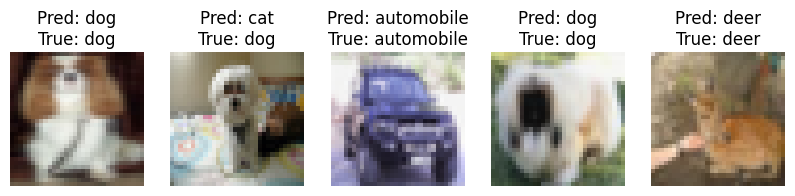

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# --- Evaluate on Test Set ---
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# --- Predict on Test Set ---
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# --- Show 5 random test images with predicted labels ---
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 5))
for i, idx in enumerate(np.random.choice(len(x_test), 5, replace=False)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[idx])
    plt.title(f"Pred: {class_names[predicted_classes[idx]]}\nTrue: {class_names[y_test[idx]]}")
    plt.axis('off')
plt.show()